# 1. PROSES AWAL

## SETTING ENVIRONMENT

Proses ini mencakup setting directory agar agar kode dapat berjalan dengan baik.



In [1]:
"""# mount the colab with google drive
from google.colab import drive
drive.mount('/content/drive')"""

"# mount the colab with google drive\nfrom google.colab import drive\ndrive.mount('/content/drive')"

In [2]:
# set folder tempat kerja (current working directory)
import os
cwd = '/Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita'
# cwd = '/content/drive/MyDrive/Monitoring Berita'

os.chdir(cwd)

## INPUT PARAMETER PENCARIAN
Pengguna dapat menambahkan parameter analisis antara lain model AI yang digunakan dan versinya, rentang tanggal pencarian, keywords pencarian, topik yang dimonitor.

In [ ]:
# AI Model (deepseek/openai)
model_name          = "deepseek"
# Model version (openai only: gpt-3.5-turbo/gpt-4o-mini/gpt-5-nano/gpt-5-mini/gpt-5)
model_version       = "gpt-5-nano"
# Tanggal awal pencarian berita [YYYY-MM-DD]
start_date          = "2025-10-05"
# Tanggal akhir pencarian berita
end_date            = "2025-10-06"
# Keywords pencarian berita
keywords_pencarian  = ["purbaya", "menkeu"]
# Keywords analisis topic
keywords_topic      = ["rokok ilegal", "makan bergizi gratis", "tax amnesty", "sidak BNI", 'lainnya']

### Menyimpan Parameter Pencarian

In [4]:
# tandai waktu mulai proses
import time 
start_process_time = time.time()

In [5]:
from datetime import datetime, timedelta

# Konversi string ke datetime
start = datetime.strptime(start_date, "%Y-%m-%d")
end = datetime.strptime(end_date, "%Y-%m-%d")

# Buat list tanggal dari end_date ke start_date (descending)
search_date = [(end - timedelta(days=i)).strftime("%Y-%m-%d")
               for i in range((end - start).days + 1)]

In [6]:
import json
from pathlib import Path

config_path = Path("config.json")

# Data baru yang ingin disimpan/diupdate
variabel = {
    "search_date": search_date,
    "keywords": keywords_pencarian,
    "topic_keywords":keywords_topic,
    "max_page_length": page_length,
    "AI_name": model_name,
    "model_version": model_version
}

# Baca isi config.json lama (jika ada)
if config_path.exists():
    try:
        with open(config_path, "r", encoding="utf-8") as f:
            config = json.load(f)
    except Exception as e:
        print(f"Gagal membaca config.json: {e}")
        config = {}
else:
    config = {}

# Update hanya key yang ada di `variabel`
config.update(variabel)

# Simpan kembali ke file
with open(config_path, "w", encoding="utf-8") as f:
    json.dump(config, f, indent=4, ensure_ascii=False)

print(f"Config.json berhasil diperbarui: {config_path}")


Config.json berhasil diperbarui: config.json


# 2. ANALISIS DATA

## 2.1 Mengumpulkan Data Berita

Proses pertama yang akan dilakukan adalah mencari sumber berita dari berbagai sumber di internet. Selama proses pengembangan ditemukan bahwa google news adalah agregator berita yang cukup lengkap. Dengan memanfaatkan really simple syndication (rss) feed yang disediakan oleh google news, dapat diambil data terkait berita dengan topik dan rentang waktu sesuai dengan kebutuhan pengguna. 

Selanjutnya, dilakukan proses pembacaan data berupa judul_berita, url_berita, tanggal_berita, dan penulis_berita. Setelah mendapatkan url_berita dari google news, tools akan melakukan proses decoding dari format url google news menjadi url dari portal berita yang dituju.

Setelah kita mendapatkan url_berita asli dari portal berita langkah selanjutnya adalah dengan membaca artikel berita. Meskipun demikian, karena adanya keterbatasan waktu dalam proses pengembangan maka terdapat beberapa portal berita yang memang belum dapat diproses karena terkendala variasi format dan terkadang juga dilindungi oleh system internal mereka. 

Hasil akhir dari proses ini adalah daftar berita yang memuat url_berita, judul_berita, artikel_berita, tanggal_berita, dan media_online. Data yang diperoleh kemudian disimpan dalam suatu file excel untuk diolah lebih lanjut.

#### Mencari Daftar Berita

In [7]:
file_loc = os.path.join(cwd, 'tarik_daftar_berita', 'list_googlenews.ipynb')

%run "$file_loc"

Mengecek dependencies...
✓ googlenewsdecoder sudah terinstall
✓ tqdm sudah terinstall

🎉 Semua dependencies siap!
Scraping Google News: 2 queries, max 0 articles per query
Date filter: 2025-10-05, 2025-10-06
Using individual date scraping: 2 × 2 = 4 tasks


Removing duplicates: 100%|██████████| 3/3 [00:00<00:00, 321.62step/s, Complex]


Removed 67 duplicates: 200 → 133 articles
Completed in 9.5s


Decoding URLs: 100%|██████████| 133/133 [00:20<00:00,  6.40url/s, Success=133, Failed=0]



Completed! File saved: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/daftar_berita/google_news_rss.xlsx
Total articles: 133


#### Konsolidasi Data Url Berita

In [8]:
file_loc = os.path.join(cwd, '01_konsolidasi_data_berita.ipynb')

%run "$file_loc"

Membaca Excel:   0%|          | 0/1 [00:00<?, ?file/s]

2025-10-06 08:35:38,886 | INFO | Duplikat dihapus: 0 baris | Total akhir: 133
2025-10-06 08:35:38,888 | INFO | Selesai gabung. Total baris: 133 | File terbaca: 1
2025-10-06 08:35:38,937 | INFO | Normalisasi selesai. Total baris: 133 | Berhasil: 133 | Gagal: 0
2025-10-06 08:35:38,939 | INFO | Filter judul < 40 chars: dihapus 0 baris | sisa: 133
2025-10-06 08:35:38,947 | INFO | Config berhasil diperbarui: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/config.json


File berhasil disimpan: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/konsolidasi_berita/hasil_gabungan_20251006_083538.csv


#### Membaca Artikel Berita

In [9]:
file_loc = os.path.join(cwd, '02_baca_link_berita.ipynb')

%run "$file_loc"

2025-10-06 08:35:40,931 | INFO | Total URL untuk diproses: 133 (limit=None)


Scraping artikel:   0%|          | 0/133 [00:00<?, ?it/s]

2025-10-06 08:35:45,513 | ERROR | not a 200 response: 502 for URL https://kumparan.com/kumparanbisnis/purbaya-tak-gentar-pada-luhut-akan-tetap-tarik-dana-mbg-jika-penyerapan-minim-25zL0JLARGF
2025-10-06 08:35:56,316 | WARNING | Attempt 1 failed for https://rri.co.id/hiburan/1883014/rivo-hibahkan-pusaka-kyai-udan-mas-ke-menkeu: HTTPSConnectionPool(host='rri.co.id', port=443): Read timed out. (read timeout=8)
2025-10-06 08:36:07,754 | WARNING | Attempt 1 failed for https://lenteratoday.com/post/item/224172/Lestarikan-Budaya-Nusantara-Rivo-Hibahkan-Pusaka-kepada-Menkeu-Purbaya: HTTPSConnectionPool(host='lenteratoday.com', port=443): Read timed out. (read timeout=8)
2025-10-06 08:36:07,755 | ERROR | Failed to fetch https://lenteratoday.com/post/item/224172/Lestarikan-Budaya-Nusantara-Rivo-Hibahkan-Pusaka-kepada-Menkeu-Purbaya: global deadline exceeded before attempt
2025-10-06 08:36:10,507 | ERROR | not a 200 response: 403 for URL https://www.inilah.com/kepala-daerah-jangan-main-main-denga

## 2.2 LABELLING ISU

Setelah kita memperoleh daftar berita sesuai dengan query pencarian pengguna, selanjutnya kita akan melakukan labeling sederhana dengan menggunakan analisis kata kunci. Labeling ini adalah proses penyaringan pertama untuk mengeluarkan konten berita yang tidak terkait dengan Kemenkeu, Nasional, dan Internasional.

In [17]:
file_loc = os.path.join(cwd, '03_labelling_awal.ipynb')

%run "$file_loc"

Normalisasi tanggal_berita: total=133, sukses=133, gagal=0 (0.0%)
Filter tanggal: 2025-10-05 s.d 2025-10-06 (dari 133 -> 133)
Labeling selesai. Jumlah baris: 133


,kategori_isu,jumlah
0,Isu Kemenkeu,128
1,Isu Nasional,4
2,Isu Lainnya,1


Tersimpan: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/hasil_labeling/hasil_labeling_20251006_090601.csv & /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/hasil_labeling/hasil_labeling_20251006_090601.xlsx
Berhasil update config.json di /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/config.json


## 2.3 ANALISIS DENGAN GEN AI

Pada tahapan ini kita telah mendapat data berita dengan query pencarian sesuai dengan kebutuhan pengguna khusus untuk isu Kemenkeu, Nasional, dan Internasional. 

Setelah mendapatkan data tersebut, kita akan melakukan proses analisis dengan menggunakan Generative AI dengan model yang biasa kita kenal seperti ChatGPT dari OpenAI, deepseek-chat dari Deepseek, atau dengan menggunakan model lain yang tersedia. Untuk saat ini model yang dapat digunakan adalah model tersebut di atas. 

Kualitas jawaban yang dihasilkan oleh generative ai ini sangat tergantung dengan prompt yang digunakan. Untuk saat ini strategi prompt engineering yang digunakan adalah one-shot prompt dimana kita meminta AI untuk menentukan beberapa parameter menggunakan prompt ketat untuk menghasilkan jawaban dengan format tertentu, dalam hal ini dengan format JSON.

Selanjutnya, jawaban dalam format JSON tersebut diekstrak dan ditambahkan ke dalam tabel untuk digunakan dalam proses analisis selanjutnya. 

#### Analisis Sentimen dan Nilai Kepentingan Berita

Setelah data berita sesuai query pengguna diperoleh, program akan memanggil AI di server dengan menggunakan API key untuk memperoleh informasi yang diperlukan. Informasi tersebut antara lain:

* Topik Berita: menentukan apakah isu berita termasuk isu Kemenkeu, Nasional, Internasional, atau Lainnya.
* Subtopik Berita: menentukan subtopik berita sesuai dengan topik berita yang akan dimonitoring oleh pengguna. 
* Sentimen Berita: menentukan sentimen berita apakah positif, negatif, atau netral berdasarkan kriteria sentimen yang biasa digunakan oleh Biro KLI dalam monitoring berita.
* Alasan Sentimen Berita: Proses berfikir AI dalam menentukan sentimen sebuah berita.
* Pejabat dalam Pemberitaan: Menarik informasi terkait pejabat/publik figur yang menjadi fokus pemberitaan.
* Pernyataan Pejabat: Mengambil informasi terkait pernyataan yang dikeluarkan oleh pejabat dalam berita.
* Tingkat Kepentingan Berita: Meminta AI untuk menentukan nilai kepenting berita terhadap Kemenkeu secara organisasi. Nilai berupa bilangan dari 0 sampai dengan 100. 

Seperti dalam diskusi sebelumnya, bahwa kualitas jawaban dari generative AI sangat tergantung dari prompt yang digunakan. Untuk saat ini, prompt yang digunakan adalah sebagai berikut:

**========= Prompt yang Digunakan Saat Ini =========**

TUGAS:
1) Tentukan nilai **"topik"** (pilih satu dari kategori berikut):
   - Kemenkeu digunakan jika berita berkaitan langsung dengan tugas/fungsi Kementerian Keuangan RI.  
   - Nasional untuk kebijakan pusat selain Kemenkeu.  
   - Internasional untuk hubungan luar negeri atau isu global. 
   - Lainnya untuk kategori yang tidak sesuai ketiganya (misalnya olahraga, hiburan, dsb.).

2) Tentukan **"subtopik"**: frasa singkat yang menggambarkan isi pokok berita sesuai dengan daftar topik di system prompt.

3) Tentukan **"sentimen"** (pilih salah satu):  
    - **Positif**
    - Ada dukungan terhadap pernyataan atau kebijakan, atau ditanggapi positif oleh pihak eksternal.
    - Kriteria:
        - Mengandung kata positif yang mendukung: “mendukung”, “membaik”, “bagus”, “meningkat”, “positif”, “optimis”, dll.
        - Dukungan bisa dari narasumber internal Kemenkeu maupun eksternal (media/editorial/opini).
        - Kata negatif seperti “penyelundupan” atau “penegahan” namun dikaitkan dengan “Bea Cukai” atau “DJBC” → positif.
        - Kata negatif seperti “penggelapan pajak” namun dikaitkan dengan “DJP” atau “Direktorat Jenderal Pajak” → positif.

    2. **Netral**
    - Ada dukungan sekaligus kritik, atau analisis berimbang (cover both side).
    - Kriteria:
        - Kata-kata aspirasi: “berharap”, “aspirasi”, “masukan”.
        - Judul clickbait dengan narasumber internal Kemenkeu → netral.
        - Penurunan indikator ekonomi (pertumbuhan, inflasi, nilai tukar, rasio gini, neraca perdagangan) tanpa asosiasi langsung ke kinerja Kemenkeu → netral.
    
    3. **Negatif**
    - Kritikan, respon negatif, atau ulasan analisa negatif terhadap kebijakan / pernyataan internal Kementerian Keuangan. 
    - Lebih strict untuk negatif dibanding positif/netral. Jika ragu, pilih netral.
    - Pengecualian: Kritik internal Kementerian Keuangan ke eksternal → netral.
    - Kriteria:
        - Kata “menurun”, “melemah”, “anjlok”, “merosot” untuk kinerja langsung Kemenkeu (APBN, penerimaan, belanja). 
        - Pengecualian jika untuk pembiayaan “utang” atau “defisit” → positif.
        - Kata terkait kasus hukum: “penangkapan”, “pemeriksaan” + “korupsi”, “OTT”, “operasi tangkap tangan”, “kode etik”.

4) Beri **"alasan_sentimen"**: penjelasan singkat (maksimal 2 kalimat) kenapa sentimen tersebut sesuai.

5) Temukan **"poin_of_interest"**: nama pejabat / public figure (dengan jabatan dan gelar jika ada) yang menjadi fokus dalam berita (jika ada).

6) Ambil **"statement_pejabat"**: **semua kutipan** langsung dari berita, persis seperti tertulis (jangan diubah atau ringkas).

7) Beri **"importance"**: angka antara 0 hingga 100 yang menunjukkan tingkat importance berita dimaksud terhadap Kementerian Keuangan sebagai sebuah lembaga.

FORMAT OUTPUT HARUS JSON (tanpa tambahan teks apa pun), contoh:


Output HARUS JSON:
{{
  "topik": "Kemenkeu|Nasional|Internasional|Lainnya",
  "subtopik": "string",
  "sentimen": "positif|netral|negatif",
  "alasan_sentimen": "string",
  "poin_of_interest": "string",
  "statement_pejabat": "string",
  "importance": 0.0
}}

In [18]:
file_loc = os.path.join(cwd, '04_analisis_dengan_genAI.ipynb')

%run "$file_loc"

API keys - Deepseek: OK | OpenAI: OK
Provider yang dipakai: deepseek


Analisis berita (parallel deepseek):   0%|          | 0/132 [00:00<?, ?berita/s]

2025-10-06 09:10:01,770 | INFO | Berhasil update config.json di config.json


Pipeline selesai. Hasil disimpan di 00_hasil_analisis/seluruh_berita/analisis_ai_20251006_deepseek_default.csv
Monitoring sementara: {'execution_datetime': '2025-10-06 09:10:01', 'provider': 'deepseek', 'model_name': 'deepseek-chat', 'elapsed_seconds': 238.36, 'output_file': '00_hasil_analisis/seluruh_berita/analisis_ai_20251006_deepseek_default.csv', 'n_rows_result_df': 132}
Monitoring log ditulis/ditambahkan ke monitoring_log_genai.csv
    execution_datetime  provider     model_name  elapsed_seconds  \
0  2025-10-06 09:10:01  deepseek  deepseek-chat           238.36   

                                                                  output_file  \
0  00_hasil_analisis/seluruh_berita/analisis_ai_20251006_deepseek_default.csv   

   n_rows_in_memory  n_rows_output_file  
0               132                 132  
📊 REKAP SENTIMEN BERITA
Total berita yang dianalisis: 132

Distribusi Sentimen:
------------------------------
😐 Netral    :   99 berita ( 75.0%)
😊 Positif   :   24 berita ( 

#### Analisis Berita Penting

Selanjutnya, kita akan filter berita dengan nilai kepentingan (importance) di atas 50, artinya berita-berita tersebut menurut AI memiliki tingkat kepentingan yang cukup tinggi terhadap organisasi Kementerian Keuangan. 

Selain itu pada tahapan ini, kita juga melakukan proses formating atas berita yang ada sehingga program dapat menghasilkan format yang sesuai dengan kebutuhan. 

**========= Contoh Format Output =========**

Daftar Berita & Konten
Senin, 6 Oktober 2025
Periode pantauan tanggal 5-6 September 2025 (pukul 14.00 s.d. 06.00 WIB)

**Media Online**

🟢 Purbaya Ingin Bangun Kawasan Industri Hasil Tembakau, Bisa Lawan Rokok Ilegal? - Bisnis.com
https://ekonomi.bisnis.com/read/20251005/259/1917519/purbaya-ingin-bangun-kawasan-industri-hasil-tembakau-bisa-lawan-rokok-ilegal

🟢 Menkeu Purbaya Ingatkan Himbara Tak Gunakan Dana Rp200 Triliun untuk Beli Dolar - Jurnal Patroli News
https://jurnalpatrolinews.co.id/nasional/purbaya-peringatkan-himbara-dana-rp200-triliun-jangan-untuk-beli-dolar/

🟢 Kenapa Purbaya hingga Tito Karnavian disebut sebagai menteri berkinerja terbaik? - Alinea.ID
https://www.alinea.id/politik/kenapa-purbaya-hingga-tito-disebut-berkinerja-terbaik-b2nvH9SbT

🟢 Menkeu Purbaya Tawarkan Amnesti, Produsen Rokok Ilegal Bisa Legalisasi - Ambisius News
https://news.ambisius.com/2025/10/05/ekonomi/menkeu-purbaya-tawarkan-amnesti-produsen-rokok-ilegal-bisa-legalisasi


⚪ CEK FAKTA: Konten Manipulatif Soal Menkeu Purbaya Beredar di Facebook - Suarakaltim.id
https://kaltim.suara.com/read/2025/10/05/203154/cek-fakta-konten-manipulatif-soal-menkeu-purbaya-beredar-di-facebook

🔴 Bahlil Tanggapi Laporan Harga LPG 3 Kg dari Purbaya ke DPR, Blak-blakan Sebut Menkeu Baru Butuh Penyesuaian - Si Jogja - sijogja.com
https://www.sijogja.com/news/18416034844/bahlil-tanggapi-laporan-harga-lpg-3-kg-dari-purbaya-ke-dpr-blak-blakan-sebut-menkeu-baru-butuh-penyesuaian


In [19]:
file_loc = os.path.join(cwd, '05_analisis_berita_penting copy.ipynb')

%run "$file_loc"

2025-10-06 09:10:01,798 | INFO | ✅ AI Configuration loaded: DEEPSEEK
2025-10-06 09:10:01,798 | INFO |    Model: deepseek-chat
2025-10-06 09:10:01,799 | INFO |    Temperature: 0.1
2025-10-06 09:10:01,799 | INFO |    Max Tokens: 5000


=== KONFIGURASI AI MODEL ===


2025-10-06 09:10:02,007 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-06 09:10:03,828 | INFO | ✅ DEEPSEEK API connection successful


🎯 AI Model: DEEPSEEK (deepseek-chat)
🔧 Temperature: 0.1
📝 Max Tokens: 5000
🔑 API Key: ********************...8d74

🧪 Testing AI connection...


2025-10-06 09:10:04,055 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-06 09:10:05,415 | INFO | Membaca file analisis AI: 00_hasil_analisis/seluruh_berita/analisis_ai_20251006_deepseek_default.csv
2025-10-06 09:10:05,424 | INFO | Total berita: 132
2025-10-06 09:10:05,425 | INFO | Berita penting (filtered): 119


✅ Test Response: AI Ready!

✅ AI configuration completed successfully!
💡 Gunakan CALL_AI_MODEL(prompt) untuk memanggil AI di sel lain.

📋 Environment Variables yang diset:
   MODEL_ANALISIS = deepseek
   AI_MODEL_NAME = deepseek-chat
   DUMMY_MODE = 0
Berhasil memuat 119 berita penting

Sample berita penting:
                                                                                                                                  judul_berita  \
0                                                             Nasib Anggaran MBG Jelang Akhir 2025, Akankah Dipotong Purbaya? - CNBC Indonesia   
38  Kontroversi Dana 200 Triliun: Kebijakan Purbaya Turunkan Bunga Deposito, Pengacara Hotman Paris Protes - Blitar Kawentar - Blitar Kawentar   
45                                                 Purbaya Ingin Bangun Kawasan Industri Hasil Tembakau, Bisa Lawan Rokok Ilegal? - Bisnis.com   
49                                                                       Luhut Minta Anggaran MBG Jangan 

Analyzing articles:   0%|          | 0/119 [00:00<?, ?article/s]2025-10-06 09:10:05,571 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-06 09:10:05,619 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-06 09:10:05,666 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
Analyzing articles:  12%|█▏        | 14/119 [00:47<07:23,  4.22s/article, completed=14, errors=0]2025-10-06 09:10:53,405 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-06 09:10:53,440 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
Analyzing articles:  20%|██        | 24/119 [01:15<03:20,  2.11s/article, completed=24, errors=0]2025-10-06 09:11:21,244 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-06 09:11:21,397 | INFO | HTTP Request: POST 

Analysis complete: 119 articles in 367.1s
Success: 119, Errors: 0
AI Provider: DEEPSEEK

Sample results (showing 3):
1. Nasib Anggaran MBG Jelang Akhir 2025, Akankah Dipotong Purba...
   Resume: Menteri Keuangan Purbaya mengancam memotong anggaran program Makan Ber...
   Dampak: Negatif
2. Kontroversi Dana 200 Triliun: Kebijakan Purbaya Turunkan Bun...
   Resume: Menteri Keuangan Purbaya memindahkan dana kas negara Rp 200 triliun da...
   Dampak: Positif
3. Purbaya Ingin Bangun Kawasan Industri Hasil Tembakau, Bisa L...
   Resume: Menteri Keuangan Purbaya Yudhi Sadewa berencana membangun kawasan indu...
   Dampak: Positif

File saved: 00_hasil_analisis/berita_penting/analisis_berita_penting_deepseek_20251006_091612.csv
🔍 Debug path info:
   Current CWD: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita
   File path: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berit

2025-10-06 09:16:24,108 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"



✅ News Update disimpan di: 00_laporan_cetak/news_update_general_20251006_091623.txt
📄 Total baris: 67

📋 Preview News Update:
------------------------------------------------------------
News Update
Kebijakan Cukai Tembakau
Jakarta, Senin, 6 Oktober 2025 (Pukul 09.00 WIB)

Pemberitaan terkait kebijakan cukai tembakau hari ini tercatat terdapat 119 berita (21 positif, 90 netral, 8 negatif) di media online.

Sorotan Media Online
• Menkeu Purbaya ancam potong anggaran Program Makan Bergizi Gratis Rp 71 T karena serapan lambat hingga September 2025.
• Luhut tolak pemotongan anggaran MBG, nilai program serap 380 ribu tenaga kerja dan gerakkan ekonomi bawah.
• Purbaya pindahkan Rp 200 T dana kas negara dari BI ke bank BUMN untuk tekan suku bunga dan dorong kredit.
• Kebijakan alih dana negara ke bank BUMN turunkan bunga deposito, memicu protas dari kalangan investor.
• Purbaya rencanakan kawasan industri tembakau dan program amnesti untuk legalkan produsen rokok ilegal.
• Pemerintah pelajar

2025-10-06 09:16:37,316 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-06 09:16:49,371 | INFO | HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"



✅ Laporan Analisis Media disimpan di: 00_laporan_cetak/laporan_analisis_media_20251006_091659.txt
📄 Total baris: 235

📋 Preview Laporan Analisis Media:
----------------------------------------------------------------------
===== Page 1 =====

**Laporan Analisis Media Online dan Media Sosial**
Senin, 6 Oktober 2025

**EXECUTIVE SUMMARY**
Periode pemantauan media online menunjukkan 119 berita penting yang berhasil dianalisis.
Dari jumlah tersebut, 63 berita sesuai dengan topik yang dipantau: makan bergizi gratis, rokok ilegal, lainnya.
Fokus pemerintah terutama pada transparansi dan pengawasan sektor keuangan.
Pernyataan dan kebijakan penting dari pejabat terkait terus dipantau secara intensif.

**MEDIA ONLINE**

**Topik Berita:** makan bergizi gratis, rokok ilegal, lainnya
**Tonasi Berita:** netral

**Pesan Kunci dan Analisis:**

**ISU KEMENKEU**
...
[215 baris lainnya]
----------------------------------------------------------------------

🎯 Selesai! File tersedia di: 00_laporan_cetak

# 3. Visualisasi Data

Setelah seluruh proses analisis selesai, program akan membuat visualisasi yang relevan dengan data yang tersedia.
Visualisasi tersebut antara lain: 
* pie chart terkait sentimen berita
* line chart terkait monitoring sentimen berita dari hari ke hari
* stacked bar chart untuk melihat proporsi per sentimen dari hari ke hari
* bar chart untuk melihat jumlah pemberitaan per media online. 
* heatmap sentimen per media per tanggal untuk melihat proporsi pemberitaan positif dari setiap portal media online.
* world cloud untuk melihat kata populer dalam pemberitaan selama periode monitoring.

✅ Konfigurasi berhasil dimuat dari config.json
   • Path berita penting: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/00_hasil_analisis/berita_penting/analisis_berita_penting_deepseek_20251006_091612.csv
   ✅ File berita penting tersedia
✅ Data berita penting berhasil dimuat!

✅ Data siap untuk divisualisasikan!
🔄 Memulai preprocessing data untuk visualisasi...
📅 Konversi format tanggal...
   ✅ Konversi tanggal berhasil
🧹 Cleaning teks untuk word cloud...
   ✅ Text cleaning berhasil
📊 Grouping data untuk analisis...
   ✅ Grouping data berhasil
📈 Perhitungan statistik...
   ✅ Statistik berhasil dihitung
✅ Preprocessing selesai!

📋 Ringkasan Data Processed:
   • Total artikel: 119
   • Rentang tanggal: 2 hari
   • Rata-rata artikel/hari: 59.5
   • Jumlah media: 85
   • Kata unik untuk word cloud: 208

🎯 Data siap untuk visualisasi!
   📊 Sentiment distribution: 3 kategori
   📅 Timeline data: 6 data points
   🏷️ To


📈 2. Line Chart - Timeline Sentimen Harian



📋 3. Stacked Bar Chart - Ringkasan Harian



🌐 4. Bar Chart - Top Media Sources



🔥 5. Heatmap - Sentimen per Media per Tanggal



☁️ 6. Word Cloud - Kata Kunci Populer


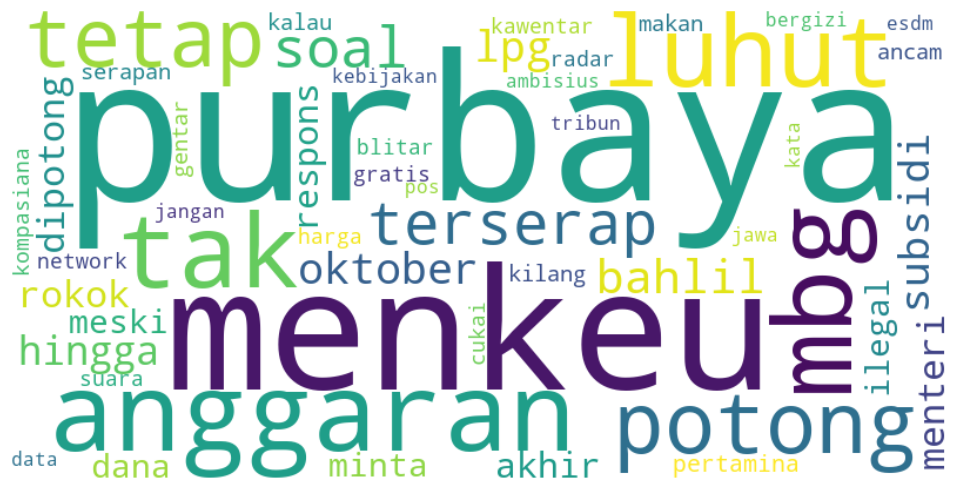


✅ Semua visualisasi telah ditampilkan!

📋 Insight Utama:
   🎯 Sentimen dominan: netral (75.6%)
   📺 Media terbanyak: news.ambisius.com (5 berita)
   🔤 Kata populer: purbaya (105), menkeu (72), anggaran (53), mbg (51), tak (45)

✅ Semua visualisasi berhasil dibuat dan ditampilkan!
💡 Tip: Scroll ke atas untuk melihat grafik-grafik yang telah dibuat.


In [21]:
file_loc = os.path.join(cwd, '06_visualisasi.ipynb')

%run "$file_loc"

#### REKAP

Tahapan akhir untuk melihat lama waktu proses untuk satu kali proses monitoring berita online.

In [16]:
# Tandai waktu selesai proses
end_process_time = time.time()
elapsed_time = end_process_time - start_process_time
# jadikan menit & detik
elapsed_minutes = int(elapsed_time // 60)
elapsed_seconds = int(elapsed_time % 60)
print(f"Waktu proses: {elapsed_minutes} menit {elapsed_seconds} detik")

Waktu proses: 19 menit 51 detik
